# Lubomir Tashev Data Science course project-08.2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
from collections import Counter

 My work as Data Sciense project is in area of bioinformatics:attempt to analize one simple DNA-sequence with methods of computer programing.At first I work with ready DNA-sequense from [here](https://raw.githubusercontent.com/biopython/biopython/master/Tests/GenBank/NC_005816.fna).The DNA-sequence is on bacterium Yersinia pestis, which make infectios diesase - plague.The data from DNA-sequence is presented in a file wich have 139 rows in one column.Our plan is to analize this sequence with a few number of algoritms. 

In [2]:
seq_data = pd.read_table("https://raw.githubusercontent.com/biopython/biopython/master/Tests/GenBank/NC_005816.fna", header = None)

In [3]:
seq_data

,0
0,>gi|45478711|ref|NC_005816.1| Yersinia pestis ...
1,TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCA...
2,TGATTCAGGAGAGTTTATGGTCACTTTTGAGACAGTTATGGAAATT...
3,AGTAGCCGGGCGATTGCCAGAGAACTGGGGATCTCCCGCAATACCG...
4,CTGAGCCGCCAAAATATACGCCGCGACCTGCTGTTGCTTCACTCCT...
...,...
134,TTGTGATTAGTCTGAAACTTCCGAAGGTGGATAACACCCGGTATTT...
135,TCAGGCAGAGGGGCTTTTTCTTTGCCACCACATAAAAAAGGCCCTC...
136,ATGATAAGGACTGAATCGATGGTTAATATGTCTAGTCCTGACTTTT...
137,TTAACGGCATGCAAAACCAAAAAATAAAAATGTGACATCGCAATGC...


At first we make attempt to download the file with sequence with pandas (and will see that this is the wrongest way)!With pd.read_table we make the file readable, on my notebook.As we see (at first time) there no unusual thing:file is with header = None, and have 139 rows in one column.

In [4]:
seq_data.dtypes

0    object
dtype: object

Here we went to see what is type of our file.

In [5]:
seq_data.columns = ["sequence"]

And here we make a name of our only one column: "sequence" with command seq_data.columns

In [6]:
seq_data

,sequence
0,>gi|45478711|ref|NC_005816.1| Yersinia pestis ...
1,TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCA...
2,TGATTCAGGAGAGTTTATGGTCACTTTTGAGACAGTTATGGAAATT...
3,AGTAGCCGGGCGATTGCCAGAGAACTGGGGATCTCCCGCAATACCG...
4,CTGAGCCGCCAAAATATACGCCGCGACCTGCTGTTGCTTCACTCCT...
...,...
134,TTGTGATTAGTCTGAAACTTCCGAAGGTGGATAACACCCGGTATTT...
135,TCAGGCAGAGGGGCTTTTTCTTTGCCACCACATAAAAAAGGCCCTC...
136,ATGATAAGGACTGAATCGATGGTTAATATGTCTAGTCCTGACTTTT...
137,TTAACGGCATGCAAAACCAAAAAATAAAAATGTGACATCGCAATGC...


In [7]:
seq_data.dtypes

sequence    object
dtype: object

And here type is not 0 and began sequence

In [8]:
seq_data.shape

(139, 1)

Here we want to see shape of seq_data and see the result: 139(rows), 1(column)

In [64]:
seq_data.loc[1]

sequence    TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCA...
Name: 1, dtype: object

At this position we see that here is something wrong:We want to see the lenght of the first row, and the anser is not full:we have nearly 46 letters on the first row, but in original data at first row the letters are 70...!

In [10]:
seq_data

,sequence
0,>gi|45478711|ref|NC_005816.1| Yersinia pestis ...
1,TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCA...
2,TGATTCAGGAGAGTTTATGGTCACTTTTGAGACAGTTATGGAAATT...
3,AGTAGCCGGGCGATTGCCAGAGAACTGGGGATCTCCCGCAATACCG...
4,CTGAGCCGCCAAAATATACGCCGCGACCTGCTGTTGCTTCACTCCT...
...,...
134,TTGTGATTAGTCTGAAACTTCCGAAGGTGGATAACACCCGGTATTT...
135,TCAGGCAGAGGGGCTTTTTCTTTGCCACCACATAAAAAAGGCCCTC...
136,ATGATAAGGACTGAATCGATGGTTAATATGTCTAGTCCTGACTTTT...
137,TTAACGGCATGCAAAACCAAAAAATAAAAATGTGACATCGCAATGC...


In [11]:
seq_data.describe().T

,count,unique,top,freq
sequence,139,139,TCTTCCGCTTCCTCGCTCACTGACTCGCTGCGCTCGGTCGTTCGGC...,1


Here we want to see statistics of the data, but answer is not full!

In [39]:
str(seq_data)

'                                              sequence\n0    >gi|45478711|ref|NC_005816.1| Yersinia pestis ...\n1    TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCA...\n2    TGATTCAGGAGAGTTTATGGTCACTTTTGAGACAGTTATGGAAATT...\n3    AGTAGCCGGGCGATTGCCAGAGAACTGGGGATCTCCCGCAATACCG...\n4    CTGAGCCGCCAAAATATACGCCGCGACCTGCTGTTGCTTCACTCCT...\n..                                                 ...\n134  TTGTGATTAGTCTGAAACTTCCGAAGGTGGATAACACCCGGTATTT...\n135  TCAGGCAGAGGGGCTTTTTCTTTGCCACCACATAAAAAAGGCCCTC...\n136  ATGATAAGGACTGAATCGATGGTTAATATGTCTAGTCCTGACTTTT...\n137  TTAACGGCATGCAAAACCAAAAAATAAAAATGTGACATCGCAATGC...\n138                                ATGCGTACCCCGACCCCTG\n\n[139 rows x 1 columns]'

Here we make a big error(which not see at the first moment).We whant to transform the data in to a string and than make some attempts to see statistics, and algoritms wich gives a information about this data.BUT!Here the string that we make is wrong!The string is not full.String that is a fragment from table data,and this is what we see at 10 cell! 

In [37]:
seq_string

'                                              sequence\n0    >gi|45478711|ref|NC_005816.1| Yersinia pestis ...\n1    TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCA...\n2    TGATTCAGGAGAGTTTATGGTCACTTTTGAGACAGTTATGGAAATT...\n3    AGTAGCCGGGCGATTGCCAGAGAACTGGGGATCTCCCGCAATACCG...\n4    CTGAGCCGCCAAAATATACGCCGCGACCTGCTGTTGCTTCACTCCT...\n..                                                 ...\n134  TTGTGATTAGTCTGAAACTTCCGAAGGTGGATAACACCCGGTATTT...\n135  TCAGGCAGAGGGGCTTTTTCTTTGCCACCACATAAAAAAGGCCCTC...\n136  ATGATAAGGACTGAATCGATGGTTAATATGTCTAGTCCTGACTTTT...\n137  TTAACGGCATGCAAAACCAAAAAATAAAAATGTGACATCGCAATGC...\n138                                ATGCGTACCCCGACCCCTG\n\n[139 rows x 1 columns]'

In [14]:
print(len(seq_data))

139


In [24]:
print(seq_data)

                                              sequence
0    >gi|45478711|ref|NC_005816.1| Yersinia pestis ...
1    TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCA...
2    TGATTCAGGAGAGTTTATGGTCACTTTTGAGACAGTTATGGAAATT...
3    AGTAGCCGGGCGATTGCCAGAGAACTGGGGATCTCCCGCAATACCG...
4    CTGAGCCGCCAAAATATACGCCGCGACCTGCTGTTGCTTCACTCCT...
..                                                 ...
134  TTGTGATTAGTCTGAAACTTCCGAAGGTGGATAACACCCGGTATTT...
135  TCAGGCAGAGGGGCTTTTTCTTTGCCACCACATAAAAAAGGCCCTC...
136  ATGATAAGGACTGAATCGATGGTTAATATGTCTAGTCCTGACTTTT...
137  TTAACGGCATGCAAAACCAAAAAATAAAAATGTGACATCGCAATGC...
138                                ATGCGTACCCCGACCCCTG

[139 rows x 1 columns]


In [16]:
len(seq_data)

139

In [17]:
seq_string = str(seq_data)

In [18]:
seq_string

'                                              sequence\n0    >gi|45478711|ref|NC_005816.1| Yersinia pestis ...\n1    TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCA...\n2    TGATTCAGGAGAGTTTATGGTCACTTTTGAGACAGTTATGGAAATT...\n3    AGTAGCCGGGCGATTGCCAGAGAACTGGGGATCTCCCGCAATACCG...\n4    CTGAGCCGCCAAAATATACGCCGCGACCTGCTGTTGCTTCACTCCT...\n..                                                 ...\n134  TTGTGATTAGTCTGAAACTTCCGAAGGTGGATAACACCCGGTATTT...\n135  TCAGGCAGAGGGGCTTTTTCTTTGCCACCACATAAAAAAGGCCCTC...\n136  ATGATAAGGACTGAATCGATGGTTAATATGTCTAGTCCTGACTTTT...\n137  TTAACGGCATGCAAAACCAAAAAATAAAAATGTGACATCGCAATGC...\n138                                ATGCGTACCCCGACCCCTG\n\n[139 rows x 1 columns]'

In [19]:
len(seq_string)

683

And what is a condition with "wrong string"?It has a faulse lentgh:683 symbols,with "not cleaned"data.There are not only the letters, and some different information..The conclusion in the case is that this way to attempt to make the things is not right.We have a faulse information, and may be with the methods of pandas(it may have a good output, but I with my work can't do the right)

In [20]:
seq_string.count("A")

111

In [21]:
seq_string.count("AG")

19

In [22]:
seq_string.count("TTTT")

3

In [41]:

seq_data_1 = ("TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATCCAGGGGGTAATCTGCTCTCC" 
"TGATTCAGGAGAGTTTATGGTCACTTTTGAGACAGTTATGGAAATTAAAATCCTGCACAAGCAGGGAATG"
"AGTAGCCGGGCGATTGCCAGAGAACTGGGGATCTCCCGCAATACCGTTAAACGTTATTTGCAGGCAAAAT"
"CTGAGCCGCCAAAATATACGCCGCGACCTGCTGTTGCTTCACTCCTGGATGAATACCGGGATTATATTCG"
"TCAACGCATCGCCGATGCTCATCCTTACAAAATCCCGGCAACGGTAATCGCTCGCGAGATCAGAGACCAG"
"GGATATCGTGGCGGAATGACCATTCTCAGGGCATTCATTCGTTCTCTCTCGGTTCCTCAGGAGCAGGAGC"
"CTGCCGTTCGGTTCGAAACTGAACCCGGACGACAGATGCAGGTTGACTGGGGCACTATGCGTAATGGTCG"
"CTCACCGCTTCACGTGTTCGTTGCTGTTCTCGGATACAGCCGAATGCTGTACATCGAATTCACTGACAAT"
"ATGCGTTATGACACGCTGGAGACCTGCCATCGTAATGCGTTCCGCTTCTTTGGTGGTGTGCCGCGCGAAG"
"TGTTGTATGACAATATGAAAACTGTGGTTCTGCAACGTGACGCATATCAGACCGGTCAGCACCGGTTCCA"
"TCCTTCGCTGTGGCAGTTCGGCAAGGAGATGGGCTTCTCTCCCCGACTGTGTCGCCCCTTCAGGGCACAG"
"ACTAAAGGTAAGGTGGAACGGATGGTGCAGTACACCCGTAACAGTTTTTACATCCCACTAATGACTCGCC"
"TGCGCCCGATGGGGATCACTGTCGATGTTGAAACAGCCAACCGCCACGGTCTGCGCTGGCTGCACGATGT"
"CGCTAACCAACGAAAGCATGAAACAATCCAGGCCCGTCCCTGCGATCGCTGGCTCGAAGAGCAGCAGTCC"
"ATGCTGGCACTGCCTCCGGAGAAAAAAGAGTATGACGTGCATCTTGATGAAAATCTGGTGAACTTCGACA"
"AACACCCCCTGCATCATCCACTCTCCATCTACGACTCATTCTGCAGAGGAGTGGCGTGATGATGGAACTG"
"CAACATCAACGACTGATGGCGCTCGCCGGGCAGTTGCAACTGGAAAGCCTTATAAGCGCAGCGCCTGCGC"
"TGTCACAACAGGCAGTAGACCAGGAATGGAGTTATATGGACTTCCTGGAGCATCTGCTTCATGAAGAAAA"
"ACTGGCACGTCATCAACGTAAACAGGCGATGTATACCCGAATGGCAGCCTTCCCGGCGGTGAAAACGTTC"
"GAAGAGTATGACTTCACATTCGCCACCGGAGCACCGCAGAAGCAACTCCAGTCGTTACGCTCACTCAGCT"
"TCATAGAACGTAATGAAAATATCGTATTACTGGGGCCATCAGGTGTGGGGAAAACCCATCTGGCAATAGC"
"GATGGGCTATGAAGCAGTCCGTGCAGGTATCAAAGTTCGCTTCACAACAGCAGCAGATCTGTTACTTCAG"
"TTATCTACGGCACAACGTCAGGGCCGTTATAAAACGACGCTTCAGCGTGGAGTAATGGCCCCCCGCCTGC"
"TCATCATTGATGAAATAGGCTATCTGCCGTTCAGTCAGGAAGAAGCAAAGCTGTTCTTCCAGGTCATCGC"
"TAAACGTTACGAAAAGAGCGCAATGATCCTGACATCCAATCTGCCGTTCGGGCAGTGGGATCAAACGTTC"
"GCCGGTGATGCAGCACTGACCTCAGCGATGCTGGACCGTATCTTACACCACTCACATGTCGTTCAAATCA"
"AAGGAGAAAGCTATCGACTCAGACAGAAACGAAAGGCCGGGGTTATAGCAGAAGCTAATCCTGAGTAAAA"
"CGGTGGATCAATATTGGGCCGTTGGTGGAGATATAAGTGGATCACTTTTCATCCGTCGTTGACACCCTGA"
"TGAATTCACGTGTTCACGCCTGAATAACAAGAATGCCGGAGATACGCAGTCATATTTTTTACACAATTCT"
"CTAATCCCGACAAGGTCGTAGGTCGTTATAGGAAAATTCTTAGCACCATTCCGGAACAATCAGAACAGCA"
"GGCCATGAACGACTGACAACATTACGAATATAAAAAACGCACCCGGGCCAGACATTCCCCCTACTGATTA"
"AACCAGCCGGACTTGTCCACGGAACGGTCTTTTTAAACCGACACACAGTCTGAGTACAGATACATGTCAC"
"GATGATGCAGGATTAGCGGAAGAGTGTGAGCACGTTTCCGGGAACTGTGGTGAACCATAGCTCAATATTC"
"GAGTGAGGGCATACCGGAAACGCGCTCAGATTCGTTGTAACGCGATTTTCCGTACCGGGCAATTTTTTCA"
"GTTGTTTTTTCGTTTCATGTCGTCAGAAACGTTCTGAGCGCGTTTCCGGCATCTGATGCTACGCAAACCA"
"TCCCCATGGTCAGTTGACAGCCGGAAACACGCGGGTGTCGTTTTAGCGTATCGACGGGACGGCGTCGAGA"
"AGCACAAAAAACAGATGTTGTACTCAGTCAGTTGTTTTACAGACAGCACTGCGGCAGATTGAAAAAGTAC"
"CGTACTTTCAGGAATGTCCAGAAACCATGTGTCAGACTTCGTTCTCCCCCTTCCGGGTGAATTTTTTTGT"
"CATCCGTTCAGGAATCTCTTTATAACGATTACTCCATTTCAGGATTTTTTATGTGGCGTTTACTACAGGC"
"AGGATATTCAAAGGCAAAAAAATCCCCCGGAACAGGCGGAACCCGGACAGGGGGAGAACGAATCGCTAAA"
"TAATTTTCGTAGTTGTATTTCCCATCGTTGCTACTGCAACGGGATGAATTTGCCGCAGTTTATCCTGTAA"
"AACAATCCTGATTTACTCACACTCCACATATCACTGACGGAGCACAACGGAATAGTGAACAAACAACAAC"
"AAACTGCGCTGAATATGGCGCGATTTATCAGAAGCCAGAGCCTGATACTGCTTGAAAAACTGGATGCTCT"
"GGATGCCGACGAGCAGGCGGCCATGTGTGAACGACTGCACGAACTCGCGGAAGAACTCCAGAACAGCATC"
"CAGGCTCGCTTTGAAGCCGAAAGTGAAACAGGAACATAACGAAGCTCCCGGAGACGGTCACAGCTTGTCT"
"GTGAACGGATGCCGGGAGCAGACAAGCCCGTCAGGGCGCGTCAGCGGGTTTTAGCGGGTGTCGGGGCGCA"
"GCCATGACCCAGTCACGTAGCGATAGCGGAGTGTATACTGGCTTAGTCATGCGGCATCAGTGCGGATTGT"
"ATGAAAAGTGCACCATGTACGGTGTGAAATGCCGCACAGATGCGTAAGGAGAACATGCAGATGCCGATGC"
"TCTTCCGCTTCCTCGCTCACTGACTCGCTGCGCTCGGTCGTTCGGCTGCGGCGAGCGGTGTCTGCTCACT"
"CAAAAGCGGTGATACTGTTATCCACACAATCAGGGGATAACGCCGGAAAGAACATGTGAGCAAAAAACGA"
"AGACCCCAGAAAAGGCCGCGCCGGAGGCGCTTTTTCCATAGGCTCCGCCCCCCTGACGAGCATCACAAAA"
"ATCGACGCTCAAGTCAGAGGTGGCGAAACCCGACAGGACTTAAAGATACCAGGCGTTTCCCCCCGGAAGC"
"TCCCTCGTGCGCTCTCCTGTTCCGACCCTGCCGCTTACCGGATACCTCTCCGCCTTTCTCCCTTCGGGAA"
"GCGTGGCGCTTTCTCATAGCTCACGCTGTTGGTATCTCAGTTCGGTGTAGGTCGTTCGCTCCAAGCTGGG"
"CTGTGTGCACGAACCCCCCGTTCAGCCCGACCACTGCGCCTTATCCGGTAACTATCGTCTTGAGTCCAAC"
"CCGGTAAGACACGACTTTACGCCACTGGCAGCAGCCATTGGTAACTGAAAAGTGGATTTAGATACGCAGA"
"ACTCTTGAAGTTGAAGCCTTATCGCGGCTACACTGAAAGGACAGCATTTGGTATCTGTGCTCCACTTAAG"
"CCAGCTACCACAGGTTAGAAAGCCTGAGAAACTTCTAACCTTCGAAAGAACCCACGCCTGAGAACGTGGG"
"TTTTTTCGTTTACAGGCAGCAGATTACGCGCAGAAAAAAAGGATCTCAAGAAGATCCTTTGATCTTTTCT"
"ACTGAATTGCGCTCCCGATCAGTTCAGCAGAAGATTATGATGGGGTTCTATGGGTATTGCTGCGGTAACA"
"CCCATGTTACTTGAGGTTGTATGTAGTCTGTGTAGAATTATACACATAAGGCTTAAACTGCTCTTTTTTT"
"TCAATATGCAATTGGAAGTTCATTGACTACATAAATAGATTATTCCAAATAATTTATTTATGTAAGAACA"
"GGATGGGAGGGGGAATGATCTCAAAGTTATTTTGCTTGGCTCTCATATTTTTATCATCAAGTGGCCTTGC"
"AGAAAAAAACACATATACAGCAAAAGACATCTTGCAAAACCTAGAATTAAATACCTTTGGCAATTCATTG"
"TCTCATGGCATCTATGGGAAACAGACAACCTTCAAGCAAACCGAGTTTACAAATATTAAAAGCAACACCA"
"AAAAACACATTGCACTTATCAATAAAGACAACTCATGGATGATATCATTAAAAATACTAGGAATTAAGAG"
"AGATGAGTATACTGTCTGTTTTGAAGATTTCTCTCTAATAAGACCGCCAACATATGTAGCCATACATCCT"
"CTACTTATAAAAAAAGTAAAATCTGGAAACTTTATAGTAGTGAAAGAAATAAAGAAATCTATCCCTGGTT"
"GCACTGTATATTATCATTAATAGCAAGCCCCTCATTATTATGAGGGGCTCATGGTTATTTTAACAATCCA"
"CTATCGATATCTTTTTGCACCAGAGCGCCCTCTCGTTTACGTCTGTCAGACATTCCATCAACAATATTAT"
"TAAAAGCATTTACAAGGCCATTCCAGTCTTTTGCGATAACTTTATTCCATACTGTGGGAGCAGTTCTGGA"
"TAACTTAAACCCTTTTTGATATCCAATAGACACCAGTGCTGTACGGGTTCTCAACGGTAAATCGCTGAAC"
"CGAAGACCGATATTAGCGTCATTGAAAAGACCTTCAATCTTATGTGAGAATTTATCAATATAAATATTAG"
"ATAAGAGATGAGCTTCATTATCAGAAAGCGTCAGAGGTGCTGTTCTCACTTTATCATAAGCCTCCTTCCC"
"TCGAAGCATATAATACCCATCAAGTCTATCTGCAATATACTGAGGGACACCGTCATTCAATAAATCCTGT"
"TTGCTTCGCTGACCAAGGTCAACCCCGGAACCGAATGTAACACCGGTACTGTTAAAATAATCGCTACTAG"
"GATTAGACGGAAAATGACTTGTCGGATTAAACCCTTCAAAACCATTACTGGAGAAAATATCGTGGTCAAC"
"AATATTTACCGAACGACGTAAAAATTCCTTCAGTTGACTAATATTGTCAAAGTTAATGACAGTGTTGTCC"
"GCTAGGACGATGCGATTTCGGTTATTATTCAGAATGTCTTCGTTCTCTTTCTTATCGAGATGTTCAATAG"
"ATTCGGCAATCGTTCCCTCAAGAACCATGACACGGTAGACTTTCACACCGTCTTTTTCCTGACCTGTTTC"
"AACAGTTATTTTCTGTTCGTAAGACACGGTCCCTTCAGTTTTTGAAATTTTACTTTCCTGGCGGATCTTA"
"TTTGAATATTCACTGTCTTTCTCCATCTCCGTATCAATCGGAAACCCCATAATGTACATCAGTTTAAAAT"
"TACTCCGGCCAGGCAGATCCACATAATGTGGTAATGCAATTGTAATCGAATTAGCTTCAAAATTTGGTCT"
"GTAACTGCTTAATGTACTTCCGGAAAAGAGAAAAGCCGGAACACCACCTGAACCATTCACTACCATTGTA"
"TCTGACATAAAAATTCCTCTTTAACACATAAAAAAAACAATAAGTTAAAAAAATACTGTACATAAAAGCA"
"CTGTTTTTATGTACAGTAATAAAATTACGCCGCTTTATTTTCTCTGTCAATAATATGAAATTTCATTTTT"
"GTGATCTGAATCACTCTTATAAAAATCAGGAAGGGAAGATTCGCAGCAGAAAAACAGCACCGGGTAACAT"
"CAGAAAAAAACAGAAAGGAGATAACGTGAGCAAAACAAAATCTGGTCGCCACCGACTGAGCAAAACAGAC"
"AAACGCCTGCTGGCTGCACTTGTCGTTGCCGGATACGAAGAACGGACAGCCCGTGACCTCATCCAGAAAC"
"ACGTTTACACACTGACACAGGCCGACCTGCGCCATCTGGTCAGTGAAATCAGTAACGGTGTGGGACAGTC"
"ACAGGCCTACGATGCGATTTACCAGGCGAGACGCATTCGTCTCGCCCGTAAATACCTGAGCGGAAAAAAA"
"CCGGAAGGGGTGGAACCCCGGGAAGGGCAGGAACGGGAAGATTTACCATAACTCCCGTTATCAGTACCAT"
"CGGCTCAACGCTCGTTGTCGGATCTGAAAAATTCGCTCAAAAGATCATATTTCCCTGGATATTTTCCACC"
"GTTTCTTATGTGAGAAAAGTCACATAATTCTGTCAGACGACGAGAAAACGGATATCGATTATTGTTTAAT"
"ATTTTTACATTATTAAAAATGAAATTAGATAATCAGATACAAATAATATGTTTTCGTTCATGCAGAGAGA"
"TTAAGGGTGTCTAATGAAGAAAAGTTCTATTGTGGCAACCATTATAACTATTCTGTCCGGGAGTGCTAAT"
"GCAGCATCATCTCAGTTAATACCAAATATATCCCCTGACAGCTTTACAGTTGCAGCCTCCACCGGGATGC"
"TGAGTGGAAAGTCTCATGAAATGCTTTATGACGCAGAAACAGGAAGAAAGATCAGCCAGTTAGACTGGAA"
"GATCAAAAATGTCGCTATCCTGAAAGGTGATATATCCTGGGATCCATACTCATTTCTGACCCTGAATGCC"
"AGGGGGTGGACGTCTCTGGCTTCCGGGTCAGGTAATATGGATGACTACGACTGGATGAATGAAAATCAAT"
"CTGAGTGGACAGATCACTCATCTCATCCTGCTACAAATGTTAATCATGCCAATGAATATGACCTCAATGT"
"GAAAGGCTGGTTACTCCAGGATGAGAATTATAAAGCAGGTATAACAGCAGGATATCAGGAAACACGTTTC"
"AGTTGGACAGCTACAGGTGGTTCATATAGTTATAATAATGGAGCTTATACCGGAAACTTCCCGAAAGGAG"
"TGCGGGTAATAGGTTATAACCAGCGCTTTTCTATGCCATATATTGGACTTGCAGGCCAGTATCGCATTAA"
"TGATTTTGAGTTAAATGCATTATTTAAATTCAGCGACTGGGTTCGGGCACATGATAATGATGAGCACTAT"
"ATGAGAGATCTTACTTTCCGTGAGAAGACATCCGGCTCACGTTATTATGGTACCGTAATTAACGCTGGAT"
"ATTATGTCACACCTAATGCCAAAGTCTTTGCGGAATTTACATACAGTAAATATGATGAGGGCAAAGGAGG"
"TACTCAGATCATTGATAAGAATAGTGGAGATTCTGTCTCTATTGGCGGAGATGCTGCCGGTATTTCCAAT"
"AAAAATTATACTGTGACGGCGGGTCTGCAATATCGCTTCTGAAAAATACAGATCATATCTCTCTTTTCAT"
"CCTCCCCTAGCGGGGAGGATGTCTGTGGAAAGGAGGTTGGTGTTTGACCAACCTTCAGATGTGTGAAAAA"
"TCACCTTTTTCACCATAATGACGGGGCGCTCATTCTGTTGTTTTGCCTTGACATTCTCCACGTCTTTCAG"
"GGCATGGAGAAGGTCAAATTAGACATGGAACGCTACTCTCCTTCCTGTAGGAAGCTCAACATCCAAGCTT"
"AATTTGCCTCCCATTGCTTCAACGTAACGCTTTAACGTCGCCAGCTTTAAATCATTTCCGCGCTGCTCCA"
"GCTTTGTTACTGCTGGCTGGCTTATACCCATCGCCTCAGCAACTTGTTTTTGTGATAACTGGAGTTCTTC"
"ACGCATCATCTGCAAGCCGACCTCAAGAATCATCTCATCTGCCATTTCTTTAATTCGTGTCTGGCTTTCA"
"GGTGAACGACTGGCAATCACCTCATCTAATGTTCTCATTACTTGCTCTCCAGTGTGTTCAGATGTGCTGT"
"AAATTCATCCTCAGCTATACGCACCAGTTTTTCATAAAACCGCTTATCATTACTTTTATCTCCTGCACAA"
"AGAACGATAGCCCGACGAATCGGATCGAACGCATAAAAGGCTCTTATCGGACGGCCAGAAAACTGAACGC"
"GAAGCTCTTTCATATTTTTGTACCGAGAACCTTTCACGGTATCGGCATATGGCCTGGGTAACTCAGGTCC"
"GTAAACCTGTAGCTTTTTCAAATCAGCCAAAACCTTTTCCTGAAGAGCGTCTTCTTGCTCATTTAGCCAG"
"TCGTCAAATCGCTGGCTAAAAAGTACCATCCACATGCTCAACCCTATAACCTGTAGCTTACCCCACTAAC"
"AATATAACCTACGAGTTATATTTTCAAGAAAAGCTGGCTATTTAACATAACGGCAATTTGTACGCACCAC"
"TGAAATGCGTTCAGCGCGATCACGGCAACAGACAGGCAAAAATAGCAACAAACCTCCCGAAAAACCGCCG"
"CGATCGCGCCTGATAAATTTTAACCTTATGCATATCTATGCAGCCAGGCGAATCACGAACGAATTGCCTG"
"CCTGATGTAACTGAAACGGGTGTTTTTTCCTGATTTGGTGGGCGTGGAAGACGGAACATGAACGGGAAAA"
"CAGAATTCATGCCAGATGAGCGCGATCTGGCAATTAAGGCAAAACACAGCAACAAAGACACGCCAGAATC"
"GCGCCCGGATATGTTTTAACGCGATTTTCAGACTCAGACAAATTCAGCAGAATGCTACTCCATTCACCGG"
"GCTGATGGTGAATACATGCGTATCCAGGATGAGTACATTTCTGGCTCTGCCACAGCTCTGTCTGTTGGCA"
"GCTTTCGCCTGTCCGGAAACCTGCTTAAAACGCTCCCGAAAGGCCTCTGAACCAGAAAGCAACAAAACAC"
"AGGCCATTAAGTAAATCGCGTTAAAACACGTCTGATGGATTGCTGCAAAAAAAAGTCCCTAATGGAGCAG"
"GGACTGTTAAACCCAGTGAATAGCGTCTAAATTAAAGTAAGAATACGACCAGGTACTCTTCAGAAAAGAG"
"ATTAATCCACCGCACAGAATAATCAACAGTAAAAACAAACAACCCTGATTTTTTATTTTTCTTTTTTTCG"
"ATAAAAACAAAATTAAAGAAATAATTAATCAGAACATTCCTTAACTTCAGGGCATTGCCTGTGTTCCATT"
"TTGTGATTAGTCTGAAACTTCCGAAGGTGGATAACACCCGGTATTTTTTTGCTCACATAAAGCCCCTCCT"
"TCAGGCAGAGGGGCTTTTTCTTTGCCACCACATAAAAAAGGCCCTCACAGGAGGTGTTCTGTGAGGGCGT"
"ATGATAAGGACTGAATCGATGGTTAATATGTCTAGTCCTGACTTTTGCATCTCCGAATATAAAACCCTGT"
"TTAACGGCATGCAAAACCAAAAAATAAAAATGTGACATCGCAATGCCAGATAATATTGACGCATGAGGGA"
"ATGCGTACCCCGACCCCTG")


And when we see that we a on wrong way, we make some different.We copy the information of DNA-sequence handly and "fully clean",and make doble upper commas in the begining and the end of every row.We close with () in tne begining and at the end of the all 139 rows.We don't use pandas and Biopython, but with Biopyhton there is a easy way to this,and I have no time to work with bio-packages.

In [42]:
seq_data_1

'TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATCCAGGGGGTAATCTGCTCTCCTGATTCAGGAGAGTTTATGGTCACTTTTGAGACAGTTATGGAAATTAAAATCCTGCACAAGCAGGGAATGAGTAGCCGGGCGATTGCCAGAGAACTGGGGATCTCCCGCAATACCGTTAAACGTTATTTGCAGGCAAAATCTGAGCCGCCAAAATATACGCCGCGACCTGCTGTTGCTTCACTCCTGGATGAATACCGGGATTATATTCGTCAACGCATCGCCGATGCTCATCCTTACAAAATCCCGGCAACGGTAATCGCTCGCGAGATCAGAGACCAGGGATATCGTGGCGGAATGACCATTCTCAGGGCATTCATTCGTTCTCTCTCGGTTCCTCAGGAGCAGGAGCCTGCCGTTCGGTTCGAAACTGAACCCGGACGACAGATGCAGGTTGACTGGGGCACTATGCGTAATGGTCGCTCACCGCTTCACGTGTTCGTTGCTGTTCTCGGATACAGCCGAATGCTGTACATCGAATTCACTGACAATATGCGTTATGACACGCTGGAGACCTGCCATCGTAATGCGTTCCGCTTCTTTGGTGGTGTGCCGCGCGAAGTGTTGTATGACAATATGAAAACTGTGGTTCTGCAACGTGACGCATATCAGACCGGTCAGCACCGGTTCCATCCTTCGCTGTGGCAGTTCGGCAAGGAGATGGGCTTCTCTCCCCGACTGTGTCGCCCCTTCAGGGCACAGACTAAAGGTAAGGTGGAACGGATGGTGCAGTACACCCGTAACAGTTTTTACATCCCACTAATGACTCGCCTGCGCCCGATGGGGATCACTGTCGATGTTGAAACAGCCAACCGCCACGGTCTGCGCTGGCTGCACGATGTCGCTAACCAACGAAAGCATGAAACAATCCAGGCCCGTCCCTGCGATCGCTGGCTCGAAGAGCAGCAGTCCATGCTGGCACTGCCTCCGG

And here we have the original data in string-ready to use, with no errors.(I thing that there is a easy way...but I don't know them)

In [43]:
len(seq_data_1)

9609

The original lenght of this data is 9609 letters, not 683!

In [45]:
seq_data_1.count("A")

2792

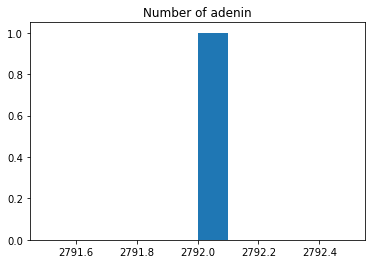

In [72]:
plt.hist(seq_data_1.count("A"))

plt.title("Number of adenin")
plt.show()

In [65]:
seq_data_1.count("T")

2468

In [66]:
seq_data_1.count("G")

2099

In [67]:
seq_data_1.count("C")

2250

In [58]:
seq_data_1.count("T") > seq_data_1.count("C") 

True

Here I finish my work!I have no time to work on my project, as I want...I will make attempt to go at the retake exam!What I do for a several days:1.Make start with pandas to make a work with ready use file.2.Read the documentation of Biopython (not full).3.Handly work with one data file, and make small "statistics" and only one visualization!For a future work I must have time to work, and don't must work(how was the case) with Biopython for only a few days...